In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import cv2

In [2]:
X_train = np.load('datasets/nucleus_train_images.npy')
Y_train = np.load('datasets/nucleus_train_labels.npy').astype(np.uint8)

In [3]:
def kmeans(mask,k):
    # perform kmeans on coordinate feature space
    # requires binary input image
    
    #convert to binary just in case
    mask = np.squeeze(mask>=0.5)
    
    # get non-zero indecies
    idx = np.transpose(np.nonzero(mask))
    
    #initialize centers and labels
    centers = np.zeros((k,2))
    labels = np.zeros(len(idx))
    
    # draw random samples
    for i in range(k):
        temp = np.random.choice(len(idx))
        centers[i,:] = idx[temp]
    
    error=[]
    delta = 1.0
    old=0.0
    while delta!=0:
        for i in range(len(idx)):
            error=[]
            for j in range(k):
                error.append(np.sqrt(np.sum((idx[i]-centers[j])**2)))
            n = np.argmin(error)
            labels[i] = n
        for m in range(k):
            avg=0
            counter=0
            for l in range(len(labels)):
                if labels[l]==m:
                    avg+=idx[l]
                    counter+=1
            if counter!=0:
                centers[m]=avg/counter
        delta=np.abs(np.sum(centers-old))
        old=centers
    
    return centers, labels, idx

                    
                    
            

In [4]:
def SumSquaredError(centers,labels,idx,k):
    temp=0
    for i in range(k):
        for j in range(len(labels)):
            if labels[j]==i:
                temp += np.sum((centers[i]-idx[j])**2)
    eps=np.sqrt(temp)
    return eps

def FindK(img):
    eps=10.0
    old=0.0
    error=[]
    k=1
    while eps>1.5:
        centers,labels,idx = kmeans(img,k)
        sse = SumSquaredError(centers,labels,idx,k)
        eps = np.abs(sse-old)
        old=sse
        error.append(eps)
        k+=1
    
        
    return k,error


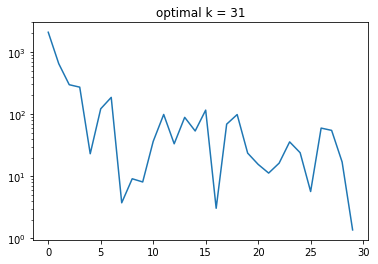

In [5]:
img = np.squeeze(Y_train[10])
k,error = FindK(img)
plt.semilogy(error)
plt.title('optimal k = '+ str(k))
plt.show()



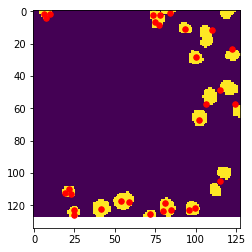

In [6]:
centers,labels,idx = kmeans(img,k)
plt.imshow(img)
for indx in centers:
    plt.scatter(indx[1],indx[0],c='r', s=30)
plt.show()

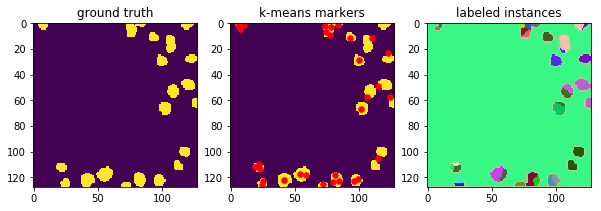

<Figure size 432x288 with 0 Axes>

In [7]:
image=cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
rand_cmap = ListedColormap(np.random.rand(128,3))
markers=np.zeros(img.shape)
temp=1
for n in range(k):
    for i in range(len(idx)):
        if labels[i]==n:
            markers[idx[i][0],idx[i][1]]=n
output = cv2.watershed(image,markers.astype(np.int32))
output=1-output

plt.figure(figsize=(10,8))
plt.subplot(131)
plt.imshow(img)
plt.title('ground truth')
plt.subplot(132)
plt.imshow(img)
for indx in centers:
    plt.scatter(indx[1],indx[0],c='r', s=30)
plt.title('k-means markers')
plt.subplot(133)
plt.imshow(output,cmap=rand_cmap)
plt.title('labeled instances')
plt.show()

plt.savefig('postprocessing5.png',bbox_inches='tight')

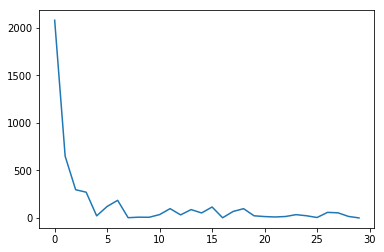

In [8]:
plt.plot(error)
plt.show()